well, it WASN'T defined after all!
Episode: 0 avg: 0 min:-200.0 max:-200.0
Episode: 500 avg: 500 min:-200.0 max:-200.0
Episode: 1000 avg: 1000 min:-200.0 max:-200.0
Episode: 1500 avg: 1500 min:-200.0 max:-200.0
Episode: 2000 avg: 2000 min:-200.0 max:-200.0
Episode: 2500 avg: 2500 min:-200.0 max:-200.0
Episode: 3000 avg: 3000 min:-200.0 max:-200.0
Episode: 3500 avg: 3500 min:-200.0 max:-200.0
Episode: 4000 avg: 4000 min:-200.0 max:-200.0
Episode: 4500 avg: 4500 min:-200.0 max:-200.0
Episode: 5000 avg: 5000 min:-200.0 max:-200.0
Episode: 5500 avg: 5500 min:-200.0 max:-169.0
Episode: 6000 avg: 6000 min:-200.0 max:-157.0
Episode: 6500 avg: 6500 min:-200.0 max:-164.0
Episode: 7000 avg: 7000 min:-200.0 max:-154.0
Episode: 7500 avg: 7500 min:-200.0 max:-146.0
Episode: 8000 avg: 8000 min:-200.0 max:-133.0
Episode: 8500 avg: 8500 min:-200.0 max:-150.0
Episode: 9000 avg: 9000 min:-200.0 max:-151.0
Episode: 9500 avg: 9500 min:-200.0 max:-143.0
Episode: 10000 avg: 10000 min:-200.0 max:-147.0
Episo

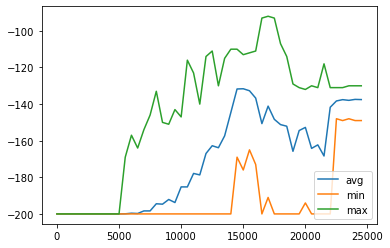

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

try:
    if env:
        env.close()
except NameError:
    print("well, it WASN'T defined after all!")

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 25000
SHOW_EVERY = 500

epsilon = 0.9
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

env = gym.make("MountainCar-v0") #https://github.com/openai/gym/wiki/MountainCar-v0
env.reset()  
discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/discrete_os_size

q_table = np.random.uniform(low=-2,high=0, size=(discrete_os_size + [env.action_space.n]))

ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg':[], 'min':[], 'max':[]}

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

for episode in range(EPISODES):
    episode_reward = 0
    if episode%SHOW_EVERY == 0:
        render = True
    else:
        render = False
    
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)

        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if(render):
            env.render()

        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1-LEARNING_RATE)*current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q)
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state
     
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        
        print(f"Episode: {episode} avg: {episode} min:{min(ep_rewards[-SHOW_EVERY:])} max:{max(ep_rewards[-SHOW_EVERY:])}")
               
env.close()    
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['avg'], label="avg")
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['min'], label="min")
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['max'], label="max")

plt.legend(loc=4)
plt.show()

# Test

In [2]:
env = gym.make("MountainCar-v0") #https://github.com/openai/gym/wiki/MountainCar-v0
env.reset() 
discrete_state = get_discrete_state(env.reset())
done = False
while not done:
    action = np.argmax(q_table[discrete_state])
    new_state, reward, done, _ = env.step(action)
    new_discrete_state = get_discrete_state(new_state)
    env.render()
    discrete_state = new_discrete_state
env.close()

### Observation space

| Num | Observation | Min | Max |
| --- | --- | --- | --- |
| 0 | position | -1.2 | 0.6 |
| 1 | velocity | -0.07 | 0.07 |

In [3]:
env.observation_space

Box(2,)

In [4]:
print(env.observation_space.high)
print(env.observation_space.low)

[0.6  0.07]
[-1.2  -0.07]


In [5]:
env.observation_space.sample()

array([0.44702658, 0.06402864], dtype=float32)

### Action space

| Num | Action |
| --- | --- |
| 0 | push left |
| 1 | no push |
| 2 | push right |

In [6]:
env.action_space

Discrete(3)

In [7]:
env.action_space.sample()

2